# **Types of Data Transformers**

In [135]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [136]:
df = pd.read_csv('./data/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [137]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [138]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [139]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],
                                                       test_size=0.3,random_state=42)

In [140]:
print(X_train.shape)

(623, 2)


# **1.Function Transformers**

## **Before Transformation**

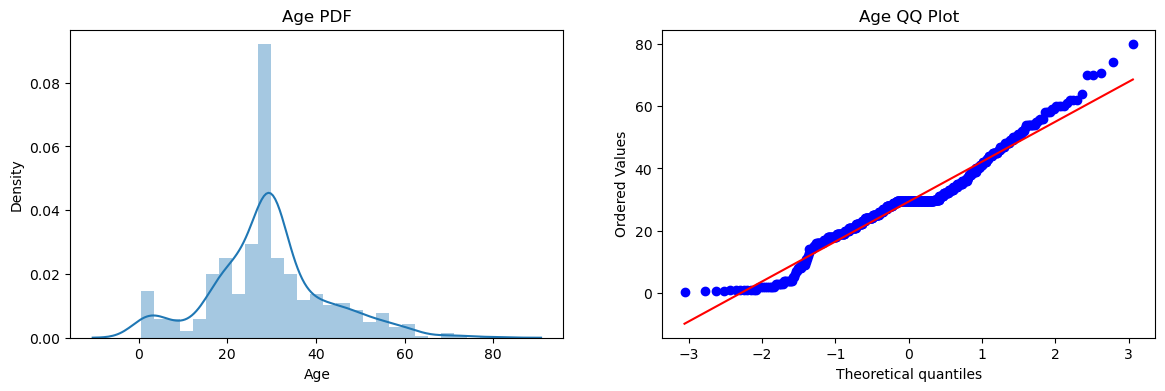

In [141]:
plt.figure(figsize=[14,4])
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')


plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()

In this code, the line plt.subplot(121) is used to create a subplot within a single figure. The notation 121 breaks down as follows:

- The first digit (1) represents the number of rows in the subplot grid.
- The second digit (2) represents the number of columns in the subplot grid.
- The third digit (1) specifies the index of the current subplot you're creating or modifying.

So, 121 means you are creating a figure with 1 row and 2 columns, and you are currently working on the 1st subplot.

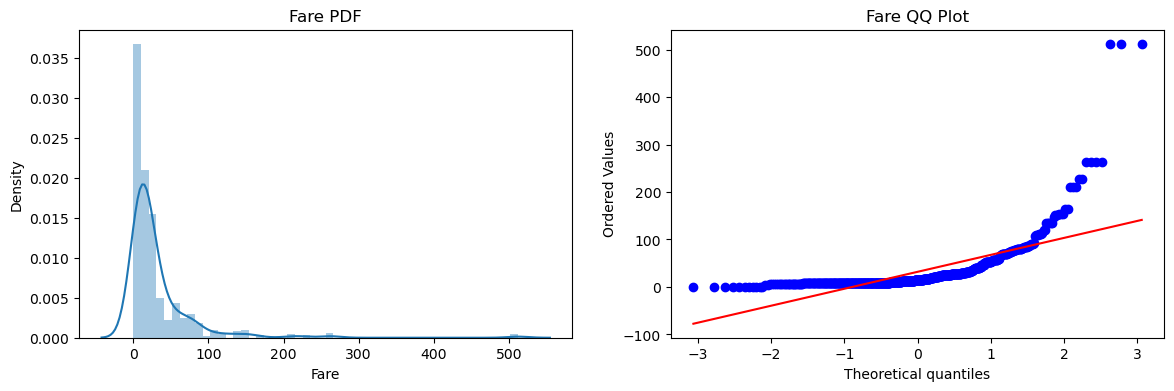

In [142]:
plt.figure(figsize=[14,4])
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')
plt.show()

In [143]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [144]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy of Logistic Regression=",accuracy_score(y_test,y_pred))
print("Accuracy Decision Tree=",accuracy_score(y_test,y_pred1))

Accuracy of Logistic Regression= 0.6529850746268657
Accuracy Decision Tree= 0.6791044776119403


## **After Transformation**

### **(i) Log Transformer**

In [145]:
trf=FunctionTransformer(func=np.log1p)

In [146]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [147]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy of Logistic Regression=",accuracy_score(y_test,y_pred))
print("Accuracy Decision Tree=",accuracy_score(y_test,y_pred1))

Accuracy of Logistic Regression= 0.6791044776119403
Accuracy Decision Tree= 0.667910447761194


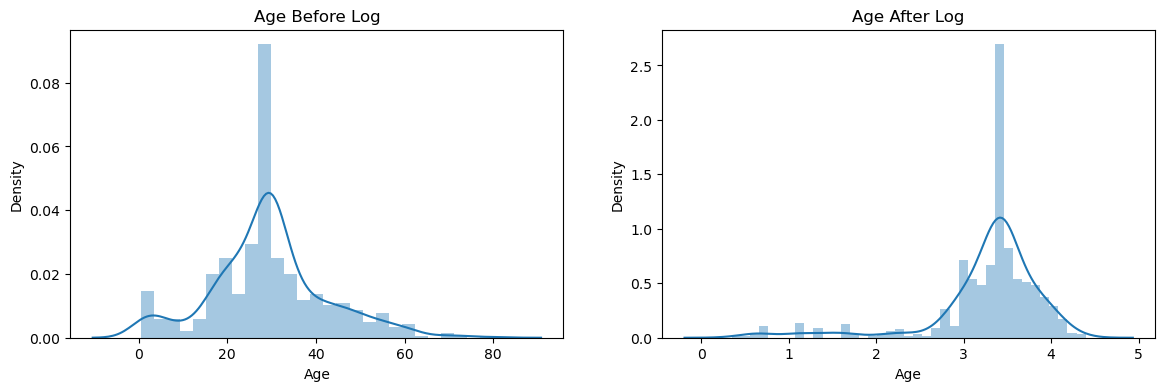

In [148]:
plt.figure(figsize=[14,4])
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age Before Log')

plt.subplot(122)
sns.distplot(X_train_transformed['Age'])
plt.title('Age After Log')
plt.show()

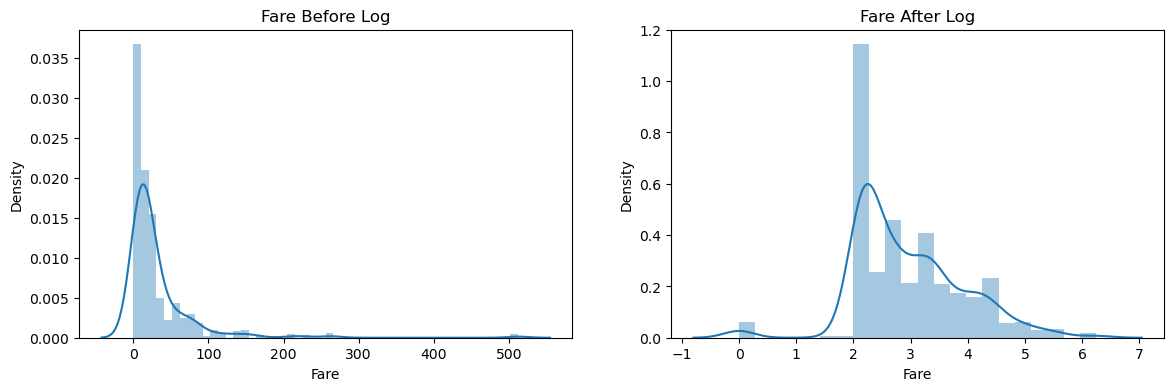

In [149]:
plt.figure(figsize=[14,4])
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare Before Log')

plt.subplot(122)
sns.distplot(X_train_transformed['Fare'])
plt.title('Fare After Log')
plt.show()

### **(ii) Square Transformer**

In [150]:
def square_transform(X):
    return X**2

In [151]:
trf2=FunctionTransformer(square_transform,validate=False)

In [152]:
X_train_transformed=trf2.fit_transform(X_train)
X_test_transformed=trf2.transform(X_test)

In [153]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy of Logistic Regression=",accuracy_score(y_test,y_pred))
print("Accuracy Decision Tree=",accuracy_score(y_test,y_pred1))

Accuracy of Logistic Regression= 0.6231343283582089
Accuracy Decision Tree= 0.6753731343283582


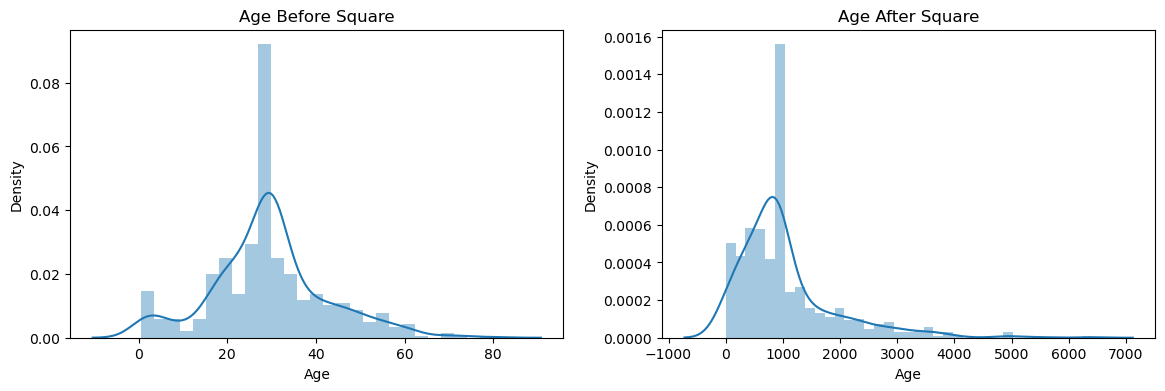

In [154]:
plt.figure(figsize=[14,4])
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age Before Square')

plt.subplot(122)
sns.distplot(X_train_transformed['Age'])
plt.title('Age After Square')
plt.show()

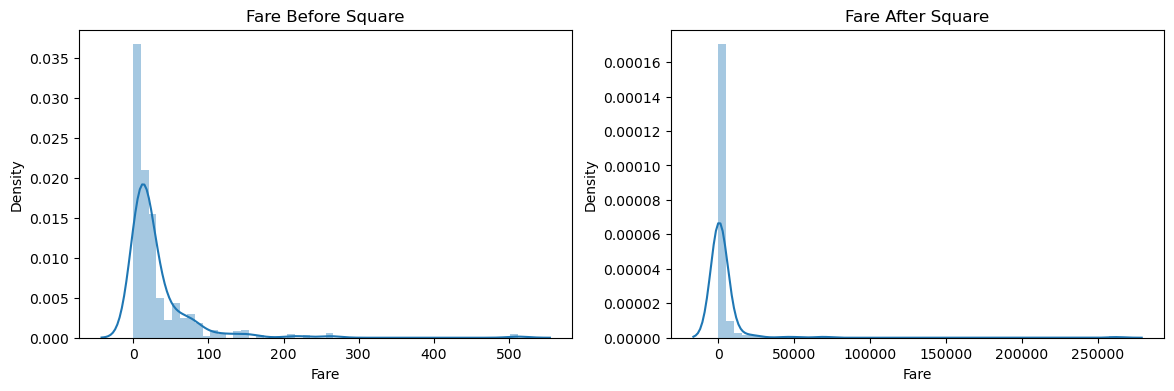

In [155]:
plt.figure(figsize=[14,4])
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare Before Square')

plt.subplot(122)
sns.distplot(X_train_transformed['Fare'])
plt.title('Fare After Square')
plt.show()

### **(iii) Square Root**

In [156]:
def square_root_transform(X):
    return X**1/2

In [157]:
trf3=FunctionTransformer(square_root_transform,validate=False)

In [158]:
X_train_transformed=trf3.fit_transform(X_train)
X_test_transformed=trf3.transform(X_test)

In [159]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy of Logistic Regression=",accuracy_score(y_test,y_pred))
print("Accuracy Decision Tree=",accuracy_score(y_test,y_pred1))

Accuracy of Logistic Regression= 0.6529850746268657
Accuracy Decision Tree= 0.6604477611940298


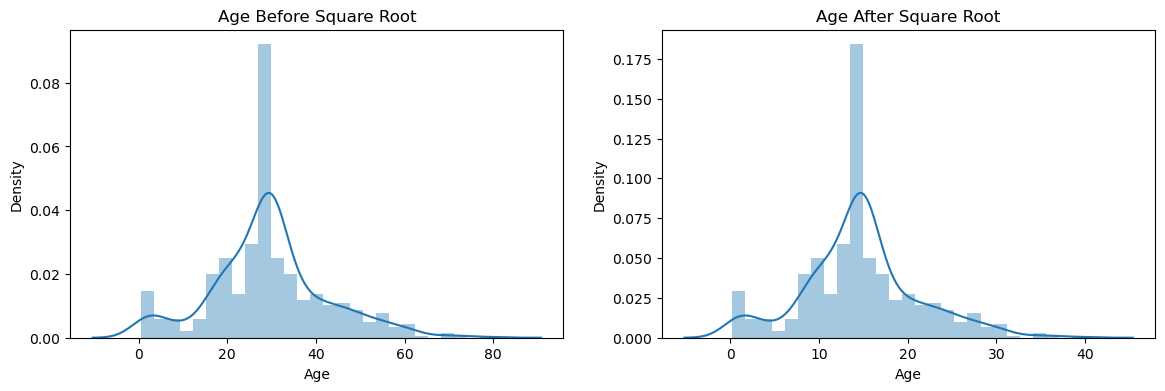

In [160]:
plt.figure(figsize=[14,4])
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age Before Square Root')

plt.subplot(122)
sns.distplot(X_train_transformed['Age'])
plt.title('Age After Square Root')
plt.show()

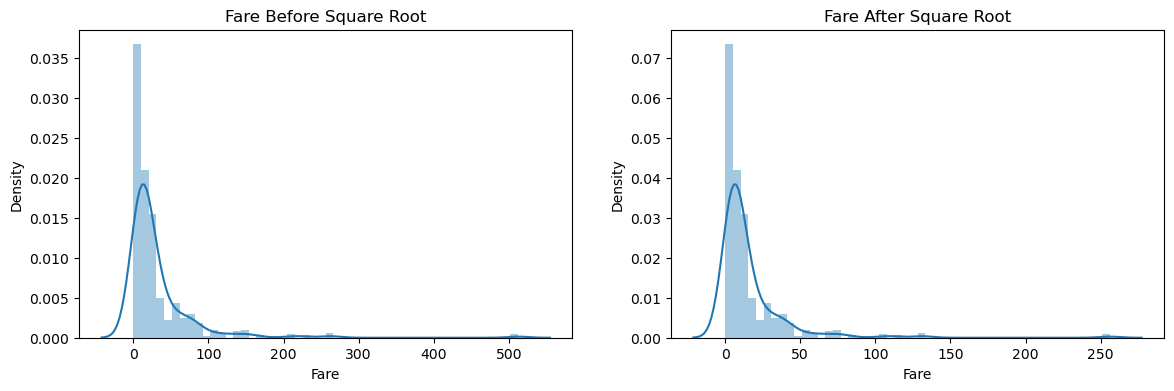

In [161]:
plt.figure(figsize=[14,4])
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare Before Square Root')

plt.subplot(122)
sns.distplot(X_train_transformed['Fare'])
plt.title('Fare After Square Root')
plt.show()